# Modeling

SmallDS

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [258]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, 150+1))[:150]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()


Read data from Test and Train csv file

In [259]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

data_train.head()

,area,room,toilet,lat,long,price-VND,loai_bds-code
0,0.400774,-1.173896,-1.101304,0.522343,1.010933,15000000000,16
1,0.030351,-1.173896,-1.101304,0.514609,0.959993,7800000000,16
2,0.400774,1.293167,2.087763,1.496456,1.048436,10800000000,14
3,1.944204,-1.173896,-1.101304,-2.282231,1.426898,6200000000,7
4,-0.587021,0.059636,0.174323,0.373993,0.790919,3100000000,0


Chia train/validation/test

In [260]:


X = data_train.drop('price-VND', axis=1)
Y = data_train['price-VND']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


x_train


,area,room,toilet,lat,long,loai_bds-code
2034,-0.216597,0.059636,0.174323,-0.448607,1.135629,0
2281,1.758992,-1.173896,-1.101304,1.125231,0.552154,7
989,-1.266130,0.059636,0.174323,-0.011996,0.147128,15
306,-0.216597,-1.173896,-1.101304,-0.567427,0.269948,16
10,-1.111787,0.059636,0.174323,1.349864,0.867487,16
...,...,...,...,...,...,...
1033,-0.803101,-1.173896,-1.101304,-0.704175,0.479024,16
3264,-0.679626,0.059636,0.174323,0.459066,-0.625110,15
1653,3.148079,-1.173896,-1.101304,0.315990,0.993432,16
2607,2.438101,-1.173896,-1.101304,1.052814,1.026872,9


In [261]:
x_test

,area,room,toilet,lat,long,loai_bds-code
533,-1.760027,0.059636,-0.463491,0.584916,-0.302901,15
2814,-1.358735,0.676401,0.812136,-0.278462,0.320889,15
582,-0.587021,-1.173896,-1.101304,-0.188468,0.341828,16
1831,-1.327867,0.059636,-0.463491,0.783536,0.300262,16
4168,0.400774,-1.173896,-1.101304,-1.577045,0.899051,9
...,...,...,...,...,...,...
3043,-0.741364,0.676401,0.174323,0.809901,-1.664239,16
4487,0.277300,-1.173896,-1.101304,1.164955,0.775918,9
2920,0.400774,-1.173896,-1.101304,-1.306009,-0.606983,7
1721,-0.370940,1.293167,1.449950,0.973366,-1.417973,16


# Tạo và lập mô hình bằng Linear Regression

In [262]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)


LinearRegression()

In [263]:
y_pred = lrg.predict(x_test)

Kiểm tra trực quan và dự đoán kết quả

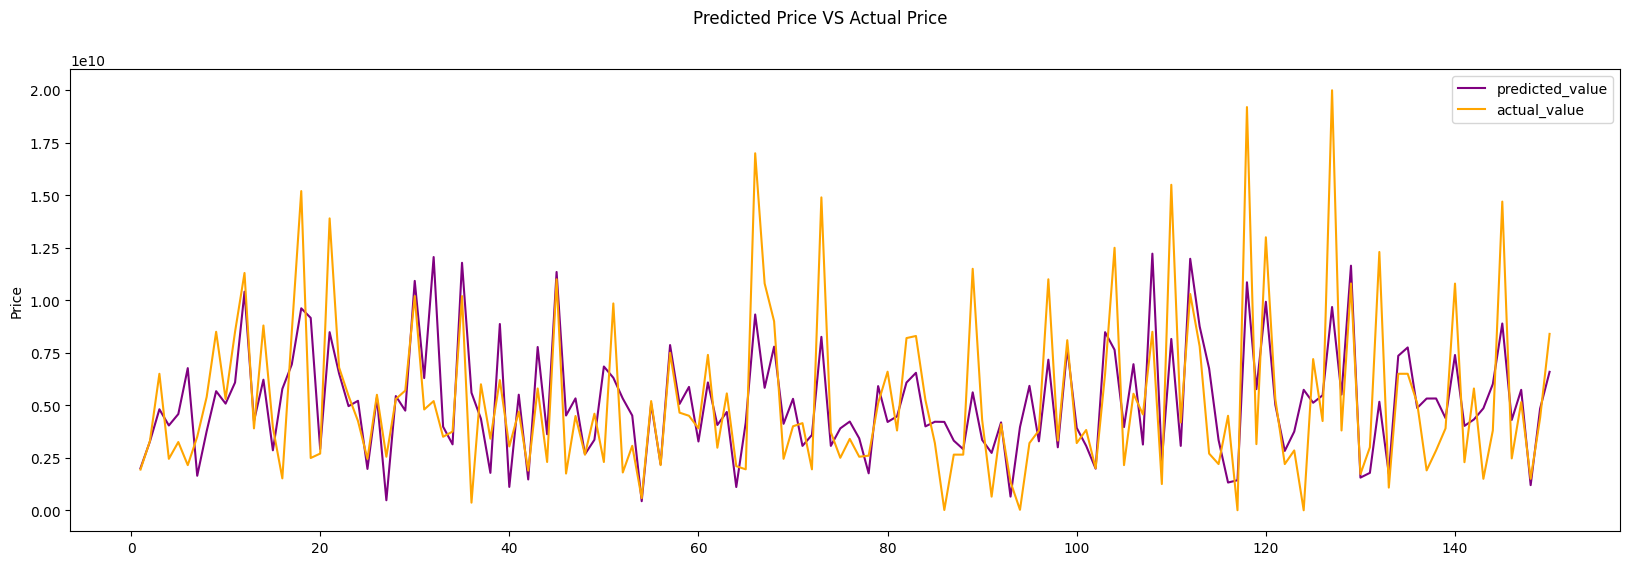

In [264]:
plot_residuals(y_test, y_pred)

Đánh giá mô hình Linear Regression

In [265]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  print(f'Accuracy score of {algorithm}:\nR2: {R2}\nRMSE: {rmse}\nMAE: {mae}')
  return (R2, rmse, mae)

In [266]:
R2_linear, rmse_linear, mae_linear=accuracy_score(y_test, y_pred, lrg)

Accuracy score of LinearRegression():
R2: 0.49431495820840765
RMSE: 2765429225.681885
MAE: 1913612580.9830692


# Linear Regression với bộ siêu tham số tối ưu

In [267]:
lrg_hyper = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4]
}
lrg_hyper_search = RandomizedSearchCV(lrg_hyper, param_grid, cv=5)
lrg_hyper_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4]})

In [268]:
lrg_hyper_search.best_params_

{'n_jobs': 1, 'fit_intercept': True, 'copy_X': False}

In [269]:
lrg_hyper = lrg_hyper_search.best_estimator_
lrg_hyper.fit(x_train, y_train)

LinearRegression(copy_X=False, n_jobs=1)

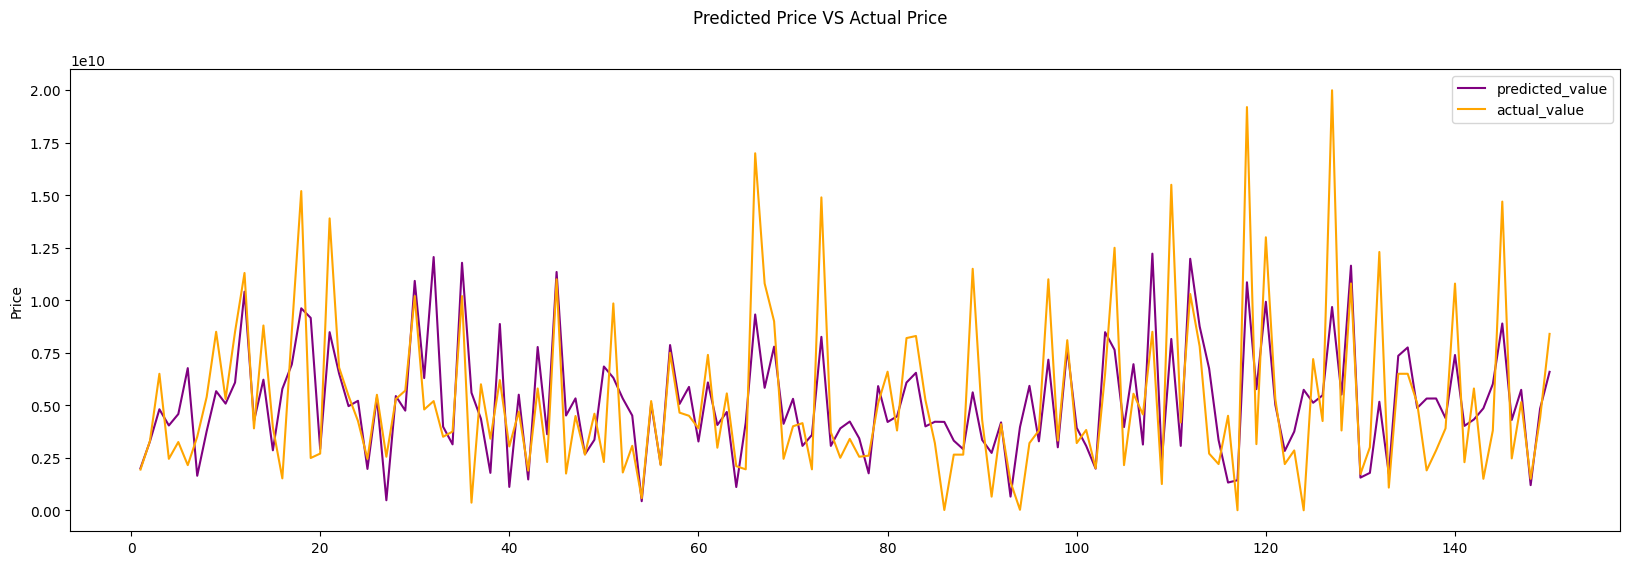

In [270]:
y_pred_linear_hyper = lrg_hyper.predict(x_test)
plot_residuals(y_test, y_pred_linear_hyper)


In [271]:
R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper=accuracy_score(y_test, y_pred_linear_hyper, lrg_hyper)

Accuracy score of LinearRegression(copy_X=False, n_jobs=1):
R2: 0.49431495820840765
RMSE: 2765429225.681885
MAE: 1913612580.9830692


# Tạo và lập mô hình bằng Logistic Regression

In [272]:
regression = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
random_cv = RandomizedSearchCV(regression, param_grid, cv=5)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']})

Bộ siêu tham số tối ưu

In [273]:
random_cv.best_params_


{'penalty': 'l2', 'C': 10}

In [274]:
regression.fit(x_train,y_train)


LogisticRegression()

In [275]:
y_pred_log = regression.predict(x_test)

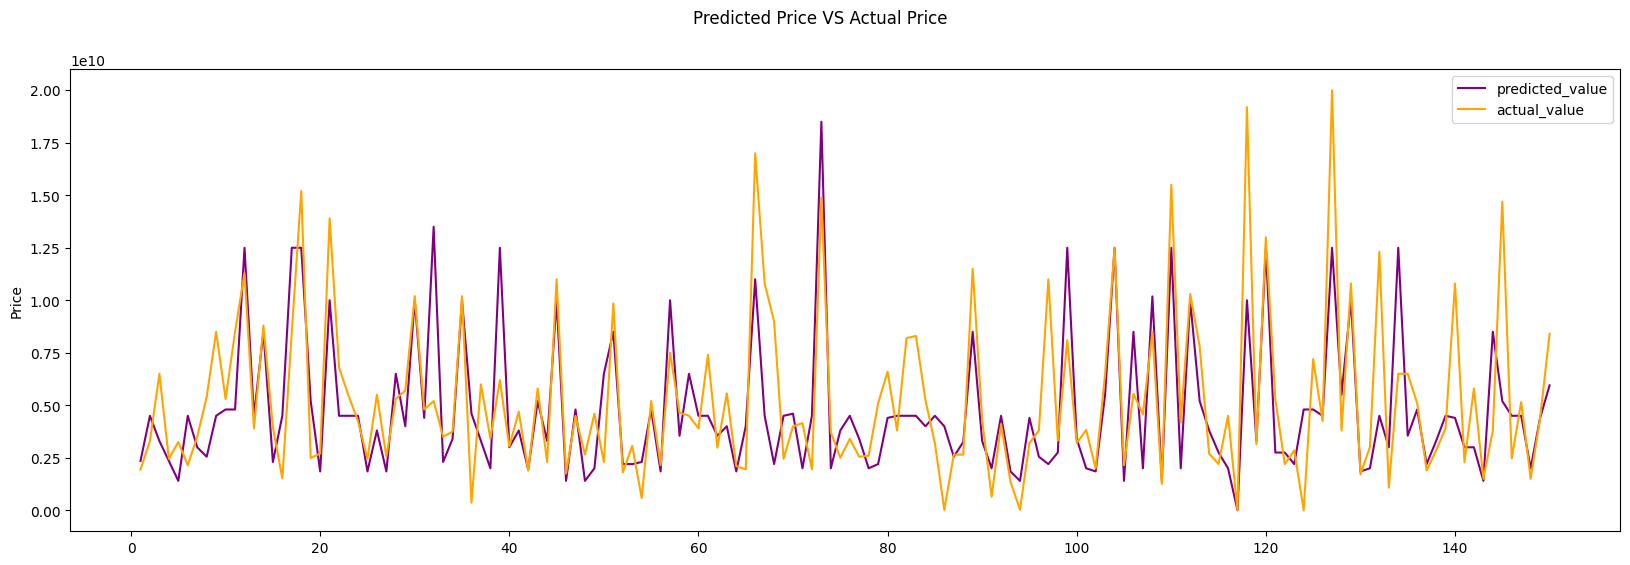

In [276]:
plot_residuals(y_test, y_pred_log)


In [277]:
R2_log, rmse_log, mae_log=accuracy_score(y_test, y_pred_log, regression)

Accuracy score of LogisticRegression():
R2: 0.9160443182007056
RMSE: 1126801823.1759741
MAE: 2039210161.059413


In [278]:

log_hyper = random_cv.best_estimator_
log_hyper.fit(x_train, y_train)

LogisticRegression(C=10)

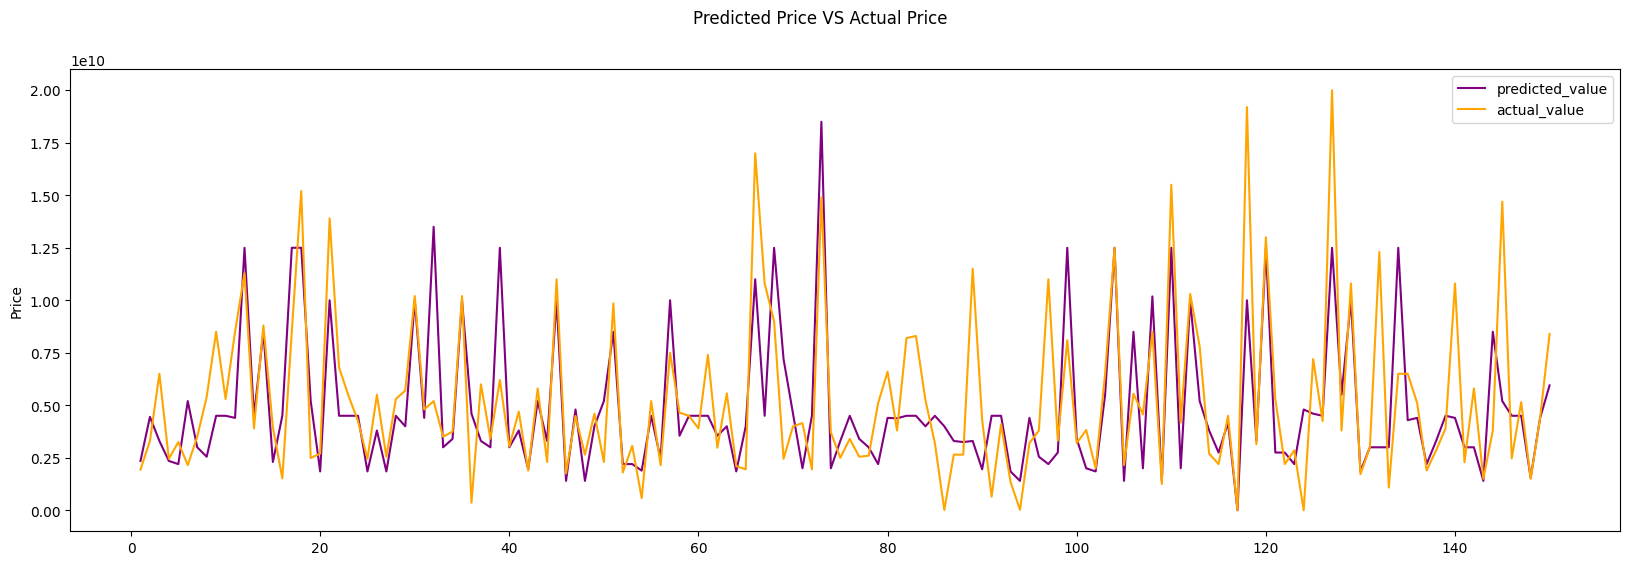

In [279]:
y_pred_log_hyper = log_hyper.predict(x_test)
plot_residuals(y_test, y_pred_log_hyper)

In [280]:
R2_log_hyper, rmse_log_hyper, mae_log_hyper=accuracy_score(y_test, y_pred_log_hyper, log_hyper)

Accuracy score of LogisticRegression(C=10):
R2: 0.9320160875860958
RMSE: 1013971087.608647
MAE: 2182528700.7874017


So sánh Logistic Regression sử dụng siêu tham số với không sử dụng

In [281]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Logistic Regression', R2_log, rmse_log, mae_log]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Logistic Regression,0.916044,1.126802e+09,2.039210e+09
1,Logistic Regression with Hyper parameter,0.932016,1.013971e+09,2.182529e+09


So sánh Logistic Regression với Linear Regression

In [282]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression', R2_linear, rmse_linear, mae_linear]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression,0.494315,2.765429e+09,1.913613e+09
1,Logistic Regression with Hyper parameter,0.932016,1.013971e+09,2.182529e+09


So sánh Logistic Regression với Linear Regression với bộ siêu tham số

In [283]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression with Hyper parameter', R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression with Hyper parameter,0.494315,2.765429e+09,1.913613e+09
1,Logistic Regression with Hyper parameter,0.932016,1.013971e+09,2.182529e+09


kiểm tra lại với test data

In [284]:
x_val= data_test.drop('price-VND', axis=1)
y_val= data_test['price-VND']


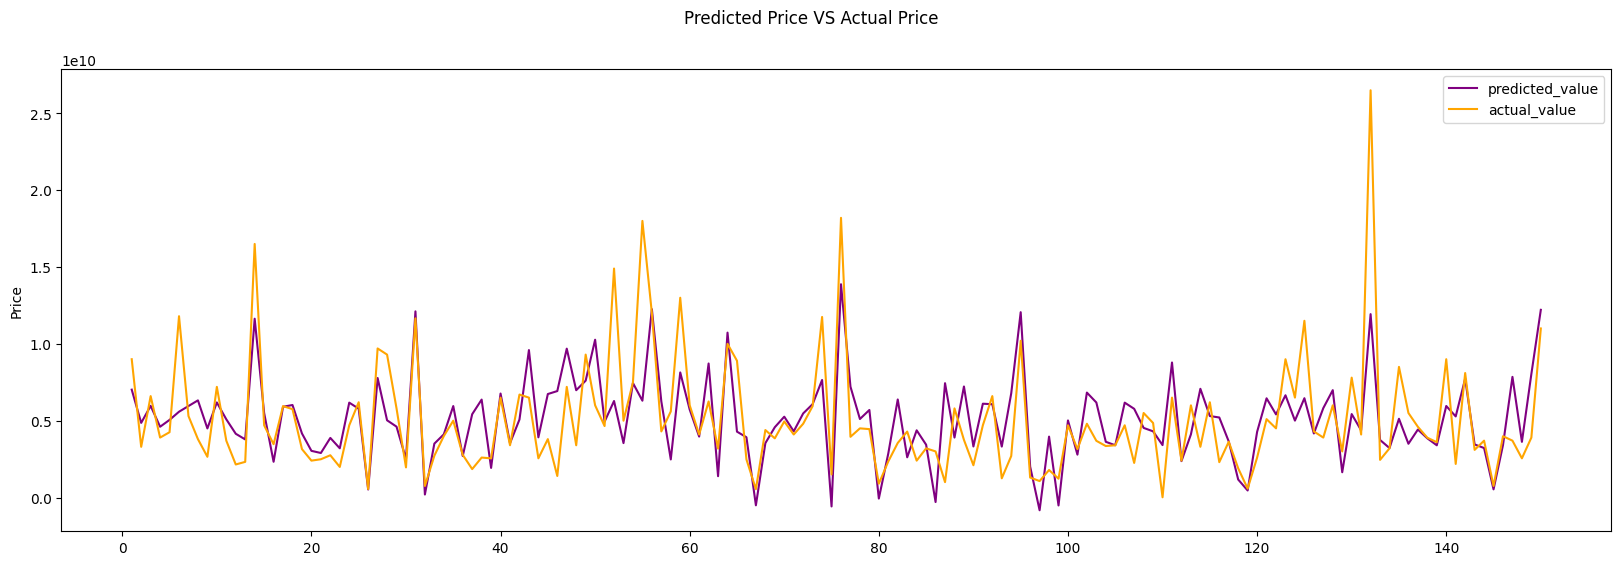

Accuracy score of LinearRegression(copy_X=False, n_jobs=1):
R2: -1937.1112685729236
RMSE: 154744427929.79745
MAE: 5816204010.872694


(-1937.1112685729236, 154744427929.79745, 5816204010.872694)

In [285]:
y_pred_linear_hyper = lrg_hyper.predict(x_val)
plot_residuals(y_val, y_pred_linear_hyper)
accuracy_score(y_val, y_pred_linear_hyper, lrg_hyper)


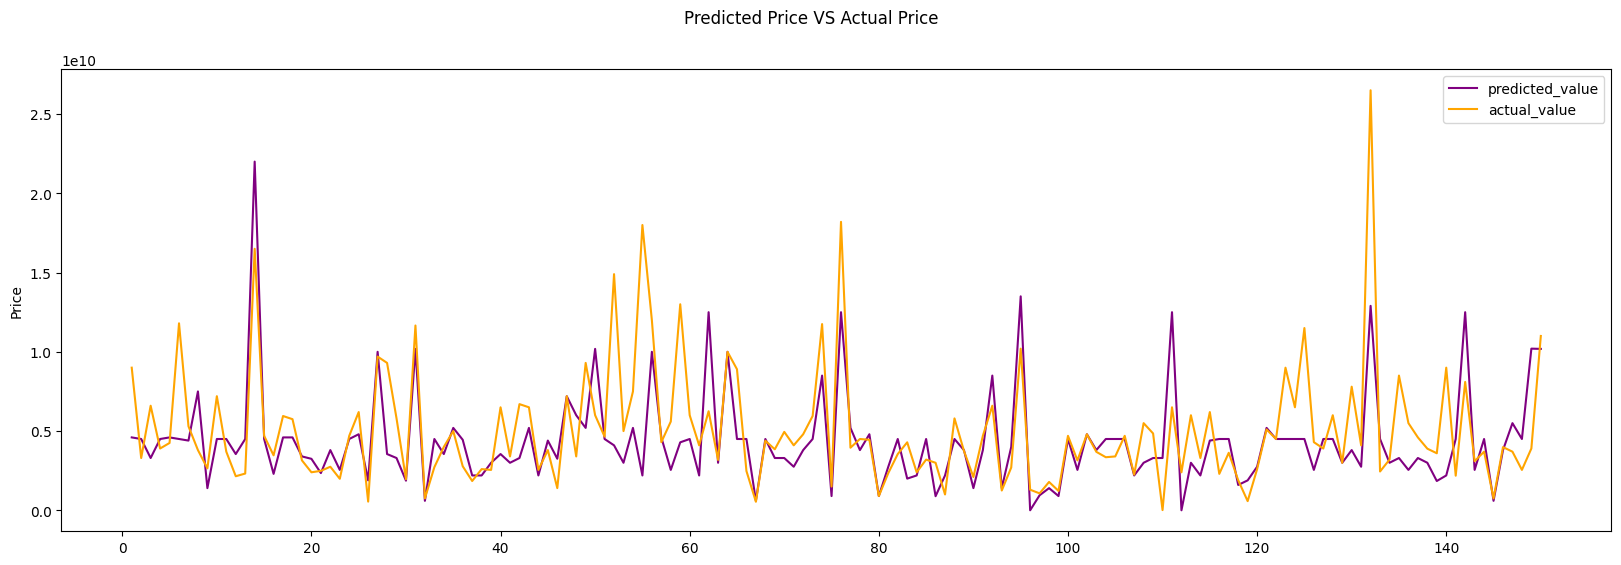

Accuracy score of LogisticRegression(C=10):
R2: 0.9021621245318165
RMSE: 1099459340.6162956
MAE: 2128413503.2467532


(0.9021621245318165, 1099459340.6162956, 2128413503.2467532)

In [286]:
y_pred_log_hyper = log_hyper.predict(x_val)
plot_residuals(y_val, y_pred_log_hyper)
accuracy_score(y_val, y_pred_log_hyper, log_hyper)